# Analyzing Code Performance

### Timing Your Code

In [13]:
def slow_way_to_calculate_mode(list_of_numbers):
    result_dict = {}
    for i in list_of_numbers:
        if i not in result_dict:
            result_dict[i] = 1
        else:
            result_dict[i] += 1

    mode_vals = []
    max_frequency = max(result_dict.values())
    for key, value in result_dict.items():
        if value == max_frequency:
            mode_vals.append(key)

    return mode_vals

In [14]:
slow_way_to_calculate_mode([4, 5, 5, 6])

[5]

In [15]:
import numpy as np

random_integers = np.random.randint(1, 1_000_000, 1_000_000)

In [17]:
import time

start = time.time()
slow_way_to_calculate_mode(random_integers)
end = time.time()

print(end - start)

0.22217178344726562


In [21]:
%%timeit -r 10 -n 10
slow_way_to_calculate_mode(random_integers)

223 ms ± 5.01 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


## Profiling Your Code

### `cProfile`

In [6]:
from collections import Counter
import numpy as np

In [62]:
def mode_using_counter(n_integers):
    random_integers = np.random.randint(1, 100000, n_integers)
    c = Counter(random_integers)
    return c.most_common(1)[0][0]

In [49]:
%%timeit -r 10 -n 10
mode_using_counter(1_000_000)

105 ms ± 5.97 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [52]:
%%prun
mode_using_counter(10_000_000)

         22 function calls in 1.088 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.019    1.019    1.019    1.019 {built-in method _collections._count_elements}
        1    0.062    0.062    1.084    1.084 3568474488.py:1(mode_using_counter)
        1    0.004    0.004    1.088    1.088 <string>:1(<module>)
        1    0.003    0.003    0.003    0.003 {built-in method builtins.max}
        1    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    1.088    1.088 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 fromnumeric.py:69(_wrapreduction)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        1    0.000    0.000    1.019    1.019 __init__.py:640(update)
        1    0.000    0.000    0.003    0.003 __init__.py:588(most_common)
        1    0.000    0.000    1.019    1.019 __init__.py:565

In [54]:
%load_ext snakeviz

In [56]:
%%snakeviz
mode_using_counter(10_000_000)

 
*** Profile stats marshalled to file 'C:\\Users\\EVERTO~1.BAN\\AppData\\Local\\Temp\\tmpyd486bwp'.
Embedding SnakeViz in this document...
<function display at 0x0000029C540A4670>


`line_profiler`

In [59]:
%load_ext line_profiler

In [63]:
%lprun -f mode_using_counter mode_using_counter(10000000)

Timer unit: 1e-07 s

Total time: 0.952909 s

Could not find file C:\Users\everton.bandeira\AppData\Local\Temp\ipykernel_29032\3568474488.py
Are you sure you are running this program from the same directory
that you ran the profiler from?
Continuing without the function's contents.

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           
     2         1     625144.0 625144.0      6.6  
     3         1    8880500.0    9e+06     93.2  
     4         1      23443.0  23443.0      0.2

## Time Complexity

In [73]:
def weighted_mean(list_of_numbers, weights):
    running_total = 0
    for i in range(len(list_of_numbers)):
        running_total += (list_of_numbers[i] * weights[i])
    return (running_total/sum(weights))

In [74]:
X = np.random.randint(1, 1000, 1000)
Y = np.random.randint(1, 1000, 1000)

In [75]:
%%timeit -n 1000
weighted_mean(X,Y)

171 μs ± 2.36 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [76]:
X = np.random.randint(1, 1000, 1000 * 2)
Y = np.random.randint(1, 1000, 1000 * 2)

In [77]:
%%timeit -n 1000
weighted_mean(X,Y)

326 μs ± 4.91 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [78]:
X = np.random.randint(1, 1000, 1000 * 3)
Y = np.random.randint(1, 1000, 1000 * 3)

In [79]:
%%timeit -n 1000
weighted_mean(X,Y)

517 μs ± 12.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [80]:
def covariance(X, Y):
    cov_sum = 0
    for i in range(len(X)):
        for j in range(len(Y)):
            cov_sum += 0.5 * (X[i] - X[j]) * (Y[i] - Y[j])
    return cov_sum / (len(X) ** 2)

In [81]:
def covariance_fast(X, Y):
    avg_X = sum(X) / len(X)
    avg_Y = sum(Y) / len(Y)

    result = 0
    for i in range(len(X)):
        result += (X[i] - avg_X) * (Y[i] - avg_Y)

    return result / len(X)

In [82]:
X = np.random.randint(1, 1000, 1000)
Y = np.random.randint(1, 1000, 1000)

In [83]:
%%timeit -n 1000
covariance_fast(X, Y)

494 μs ± 10.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [84]:
%%timeit -n 1000
covariance(X, Y)

KeyboardInterrupt: 

## Code to generate Figure 2.3

In [85]:
import matplotlib.pyplot as plt
import numpy as np

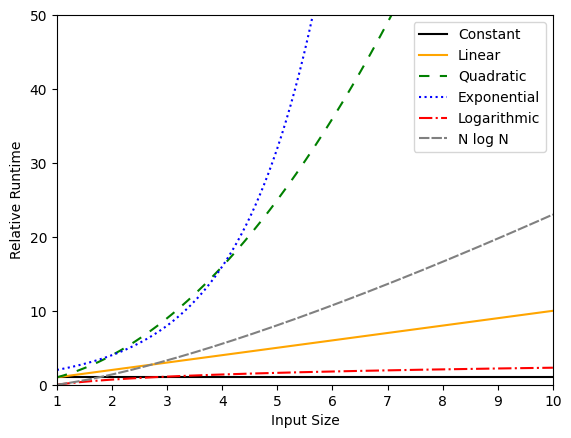

In [86]:
n = np.linspace(1, 10, 1000)
line_names = [
    "Constant",
    "Linear",
    "Quadratic",
    "Exponential",
    "Logarithmic",
    "N log N",
]

colors = ["black", "orange", "green", "blue", "red", [0.5, 0.5, 0.5]]
linestyles = ["solid", "solid", (0, (5, 5)), "dotted", "dashdot", (0, (5, 1))]
big_o = [np.ones(n.shape), n, n**2, 2**n, np.log(n), n * (np.log(n))]

fig, ax = plt.subplots()
fig.set_facecolor("white")

ax.set_ylim(0, 50)
ax.set_xlim(1, 10)
for i in range(len(big_o)):
    ax.plot(n, big_o[i], label=line_names[i], color=colors[i], linestyle=linestyles[i])
ax.set_ylabel("Relative Runtime")
ax.set_xlabel("Input Size")
ax.legend()
fig.savefig("seds_0202_v3.png", bbox_inches="tight")